## 09. Fitting Multiple Logistic Regression

In [1]:
/* Import dataset */
proc import 
    datafile='/home/u43674369/projects/project01/placement_data.csv' 
    out=df dbms=csv replace;
run;

/* Replace missing values with 0 */
proc stdize data=df
    out=df
    reponly missing=0;
run;

Error trying to read authinfo file:C:\Users\james\_authinfo
[Errno 2] No such file or directory: 'C:\\Users\\james\\_authinfo'
Did not find key oda in authinfo file:C:\Users\james\_authinfo

Please enter the IOM user id: james.ssjeong@gmail.com
Please enter the password for IOM user : ········
SAS Connection established. Subprocess id is 5980

7                                                          The SAS System                      Sunday, November  1, 2020 04:55:00 PM

34         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
34       ! ods graphics on / outputfmt=png;
35         
36         /* Import dataset */
37         proc import
38             datafile='/home/u43674369/projects/project01/placement_data.csv'
39             out=df dbms=csv replace;
40         run;
NOTE: Unable to open parameter catalog: SASUSER.PARMS.PARMS.SLIST in update mode. Temporary parameter values will be saved to 
WORK.PARMS.PARM


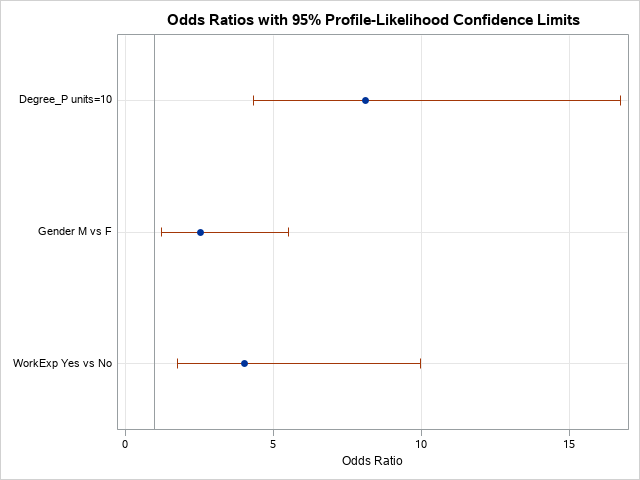
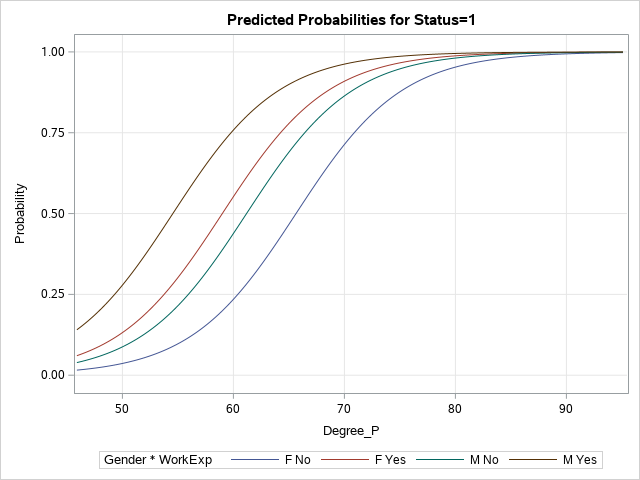

In [2]:
/* Fitting a multiple logistic regression model */
/* to characterize the relationship between */
/* variables, Status and Degree_P, Gender, and WorkExp */
/* Part A */

proc format;
	value $job 'Placed' = 1
			   'Not Placed' = 0;
run;

ods graphics on;

proc logistic data=df plots(only)=(effect oddsratio);
	class Gender(ref='F') WorkExp(ref='No') / param=ref;
	model Status(event='1') = Degree_P Gender WorkExp / clodds=pl;
	units Degree_P=10;
	format Status $job.;
	title "LOGISTIC MODEL (2): Status = Degree_P Gender WorkExp";
run;
title;

ods graphics off;


/* Fitting a multiple logistic regression model */
/* with interactions between predictor variables */
/* Part B */

proc format;
	value $job 'Placed' = 1
			   'Not Placed' = 0;
run;

ods graphics on;

proc logistic data=df plots(only)=(effect oddsratio);
	class Gender(ref='F') WorkExp(ref='No') / param=ref;
	model Status(event='1') = Degree_P|Gender|WorkExp @2 /
		  selection=backward clodds=pl slstay=0.10;
	units Degree_P=10;
	format Status $job.;
	title "LOGISTIC MODEL (3): Backward Elimination"
		  "Status = Degree_P|Gender|WorkExp";
run;
title;

ods graphics off;


/* Fitting a multiple logistic regression model */
/* with all odds ratio for each value of the variables */
/* that are involved in an interaction form the final model */
/* Part C */

Proc format;
	value $job 'Placed' = 1
			   'Not Placed' = 0;
run;

ods graphics on;

proc logistic data=df plots(only)=oddsratio(range=clip);
	class Gender(ref='F') WorkExp(ref='No') / param=ref;
	model Status(event='1') = Degree_P|Gender WorkExp;
	units Degree_P=10;
	oddsratio Degree_P / at (Gender=all) cl=pl;
	oddsratio Gender / at (Degree_P= 50 70) cl=pl;
	format Status $job.;
	title 'LOGISTIC MODEL (3.1): Status = Degree_p|Gender WorkExp';
run;
title;

ods graphics off;